In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
def plot_model(validation_score, train_score, k_to_try, chosen_k, scoring, dist_method):
    """
    Plot the model with lines showing score of training and validation data.
    """
    plt.figure(figsize = (8,5))
    sns.lineplot(y = validation_score, x = k_to_try, label = 'validation_data')
    sns.lineplot(y = train_score, x = k_to_try, label = 'training_data')
    plt.axvline(x=chosen_k, linestyle='--')
    plt.xlabel('k')
    plt.ylabel(scoring)
    plt.title('Chosing The Best K for KNN, Method ' + dist_method)
    plt.legend()
    plt.show()

In [3]:
def tune_model(k_to_try, X, y, cv, score_metric, dist_method):
    """
    Tune the model by choosing the best k.
    """
    validation_scores = []
    train_scores = []
    fit_times = []
    score_times = []
    results_list = []
    
    # get the scores for each model with different k
    for curr_k in k_to_try:   
        model = KNeighborsRegressor(n_neighbors=curr_k, metric=dist_method, weights='distance')
        results = cross_validate(model, X, y, cv=cv, scoring=[score_metric], return_train_score = True)
        validation_scores.append(np.mean(results['test_'+score_metric]))
        train_scores.append(np.mean(results['train_'+score_metric]))
        fit_times.append(np.mean(results['fit_time']))
        score_times.append(np.mean(results['score_time']))
        results_list.append(results)
    
    # choose the best k
    chosen_k_id = np.argmax(validation_scores)
    chosen_k = k_to_try[chosen_k_id]
    # choose the training score with the best validation score
    training_score_with_max_val_score = train_scores[chosen_k_id]
    # choose the best validation score
    max_validation_score = np.max(validation_scores)
    # fitting time on train set
    fit_time = fit_times[chosen_k_id]
    # scoring time on test set
    score_time = score_times[chosen_k_id]
    
    # plot the model for comparison
    plot_model(validation_scores, train_scores, k_to_try, chosen_k, score_metric, dist_method)
    
    return chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time

#### Use all the features in the processed dataset for training and testing model.

In [4]:
df = pd.read_csv('knn_input.csv')

In [5]:
# drop time column
df = df.drop(columns=['Time'])

Extract features and target.

In [6]:
x = df.values[:, :-3]
y = df.values[:, -3:]

Split data into training and test set with ratio of 0.8 and 0.2 respectively.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [8]:
# LMP_Norm
y_train_1 = y_train[:, 0]
y_test_1 = y_test[:, 0]

# PV_kwAC_out_Norm
y_train_2 = y_train[:, 1]
y_test_2 = y_test[:, 1]

# Community_Load
y_train_3 = y_train[:, 2]
y_test_3 = y_test[:, 2]

Tune the model with different distance method.

In [9]:
# mumber of k-fold
cv_splits = 5

# initialize k-fold
cv = KFold(n_splits=cv_splits, shuffle=True, random_state=101)

# number of k for tuning
k = np.arange(1, 10, 1)

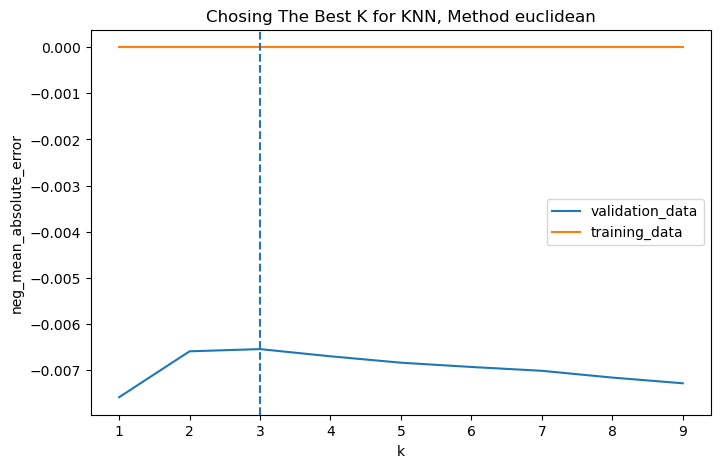

Target = LMP_Norm
Chosen k: 3 			 Training NMAE: 0.0000 			 Validation NMAE: -0.0065
Fit time in second: 0.0009 	 Score time in second: 0.3587 		 cv_splits: 5


In [10]:
# tune model using euclidean distance method
# target column is LMP_Norm
score_metric = 'neg_mean_absolute_error'
dist_method = 'euclidean'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_1, cv, score_metric, dist_method)
print("Target = LMP_Norm")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time in second: %.4f \t Score time in second: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


Since the metric is negative mean absolute error, that means the higher NMAE is, the better the model is.

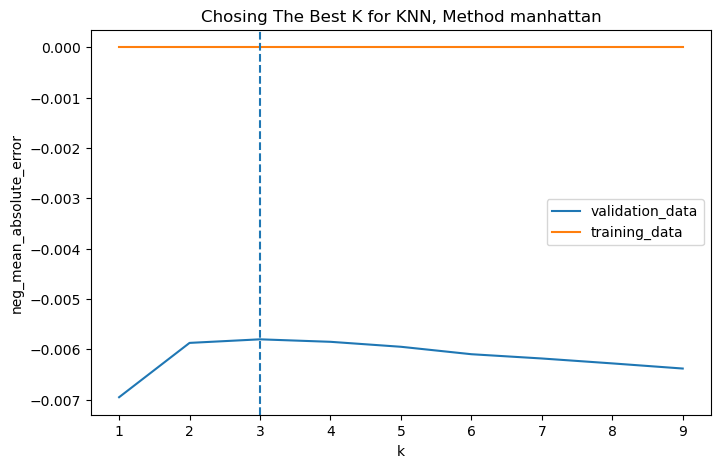

Target = LMP_Norm
Chosen k: 3 			 Training NMAE: 0.0000 		 Validation NMAE: -0.0058
Fit time: 0.0009 		 Score time: 0.8200 		 cv_splits: 5


In [11]:
# tune model using manhattan distance method
# target column is LMP_Norm
score_metric = 'neg_mean_absolute_error'
dist_method = 'manhattan'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_1, cv, score_metric, dist_method)
print("Target = LMP_Norm")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time: %.4f \t\t Score time: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


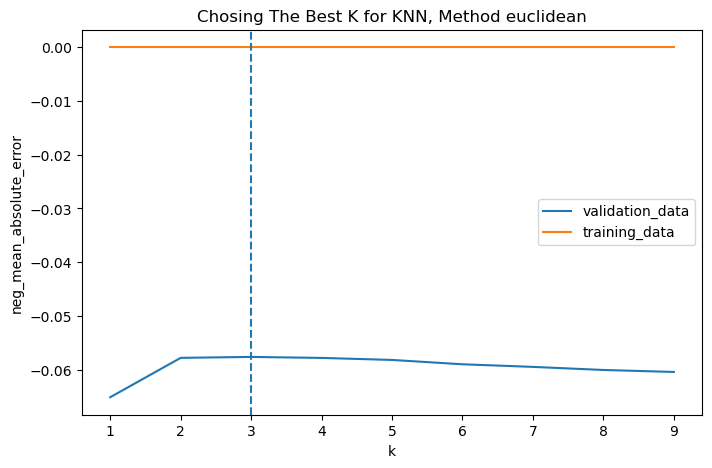

Target = PV_kwAC_out_Norm
Chosen k: 3 			 Training NMAE: 0.0000 			 Validation NMAE: -0.0576
Fit time in second: 0.0009 	 Score time in second: 0.3605 		 cv_splits: 5


In [12]:
# tune model using euclidean distance method
# target column is PV_kwAC_out_Norm
score_metric = 'neg_mean_absolute_error'
dist_method = 'euclidean'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_2, cv, score_metric, dist_method)
print("Target = PV_kwAC_out_Norm")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time in second: %.4f \t Score time in second: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


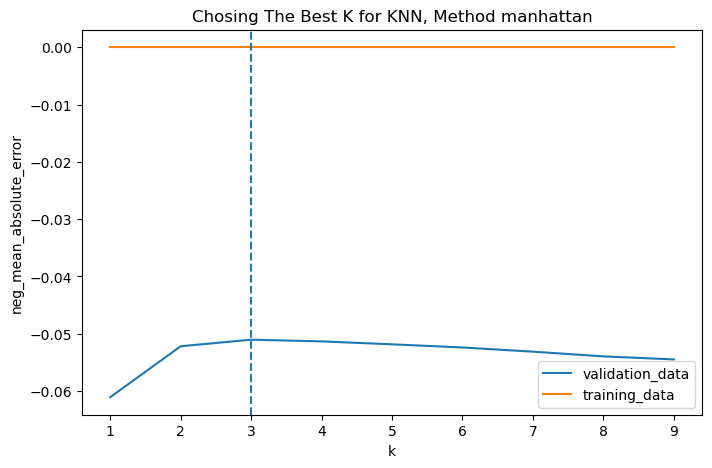

Target = PV_kwAC_out_Norm
Chosen k: 3 			 Training NMAE: 0.0000 		 Validation NMAE: -0.0510
Fit time: 0.0009 		 Score time: 0.8205 		 cv_splits: 5


In [13]:
# tune model using manhattan distance method
# target column is PV_kwAC_out_Norm
score_metric = 'neg_mean_absolute_error'
dist_method = 'manhattan'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_2, cv, score_metric, dist_method)
print("Target = PV_kwAC_out_Norm")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time: %.4f \t\t Score time: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


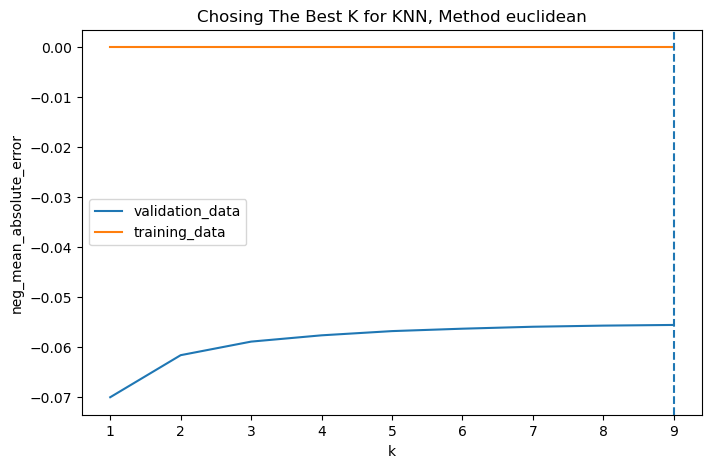

Target = Community_Load
Chosen k: 9 			 Training NMAE: 0.0000 			 Validation NMAE: -0.0556
Fit time in second: 0.0009 	 Score time in second: 0.4959 		 cv_splits: 5


In [14]:
# tune model using euclidean distance method
# target column is Community_Load
score_metric = 'neg_mean_absolute_error'
dist_method = 'euclidean'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_3, cv, score_metric, dist_method)
print("Target = Community_Load")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time in second: %.4f \t Score time in second: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


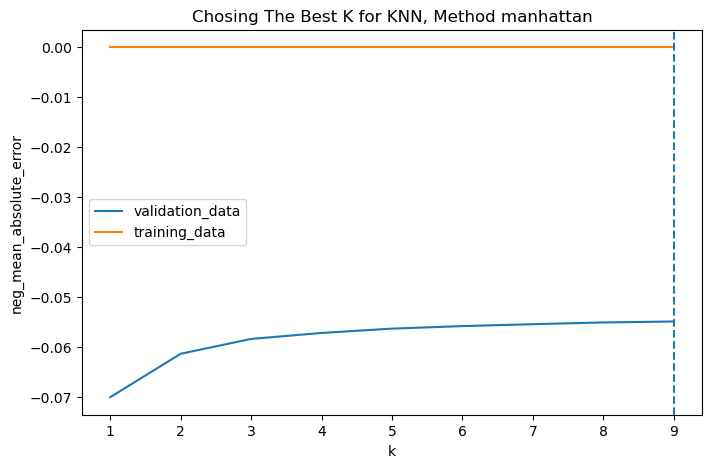

Target = Community_Load
Chosen k: 9 			 Training NMAE: 0.0000 		 Validation NMAE: -0.0548
Fit time: 0.0009 		 Score time: 0.9513 		 cv_splits: 5


In [15]:
# tune model using manhattan distance method
# target column is Community_Load
score_metric = 'neg_mean_absolute_error'
dist_method = 'manhattan'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_3, cv, score_metric, dist_method)
print("Target = Community_Load")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time: %.4f \t\t Score time: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


Test the model.

In [16]:
# test model using manhattan distance method
k = 3
m = 'manhattan'
t = 'LMP_Norm'

knn = KNeighborsRegressor(n_neighbors=k, metric=m, weights='distance')
knn.fit(X_train, y_train_1)
pred = knn.predict(X_test)

print("k = %d, distance method = %s, target = %s" % (k, m, t))
print()

# mean absolute error
mae = mean_absolute_error(y_test_1, pred)

# mean absolute percentage error
mape = mean_absolute_percentage_error(y_test_1, pred)

print("mae =", mae)
print("mape =", mape)

k = 3, distance method = manhattan, target = LMP_Norm

mae = 0.0049524069011663225
mape = 0.03754709746193816


In [17]:
# test model using manhattan distance method
k = 3
m = 'manhattan'
t = 'PV_kwAC_out_Norm'

knn = KNeighborsRegressor(n_neighbors=k, metric=m, weights='distance')
knn.fit(X_train, y_train_2)
pred = knn.predict(X_test)

print("k = %d, distance method = %s, target = %s" % (k, m, t))
print()

# mean absolute error
mae = mean_absolute_error(y_test_2, pred)

# mean absolute percentage error
mape = mean_absolute_percentage_error(y_test_2, pred)

print("mae =", mae)
print("mape =", mape)

k = 3, distance method = manhattan, target = PV_kwAC_out_Norm

mae = 0.04778045246669446
mape = 11078099995504.2


MAPE is much greater than 100% because target values have zero.

In [18]:
# test model using manhattan distance method
k = 3
m = 'manhattan'
t = 'Community_Load'

knn = KNeighborsRegressor(n_neighbors=k, metric=m, weights='distance')
knn.fit(X_train, y_train_3)
pred = knn.predict(X_test)

print("k = %d, distance method = %s, target = %s" % (k, m, t))
print()

# mean absolute error
mae = mean_absolute_error(y_test_3, pred)

# mean absolute percentage error
mape = mean_absolute_percentage_error(y_test_3, pred)

print("mae =", mae)
print("mape =", mape)

k = 3, distance method = manhattan, target = Community_Load

mae = 0.05768587417040235
mape = 0.12441452500782751


K-Means Clustering.

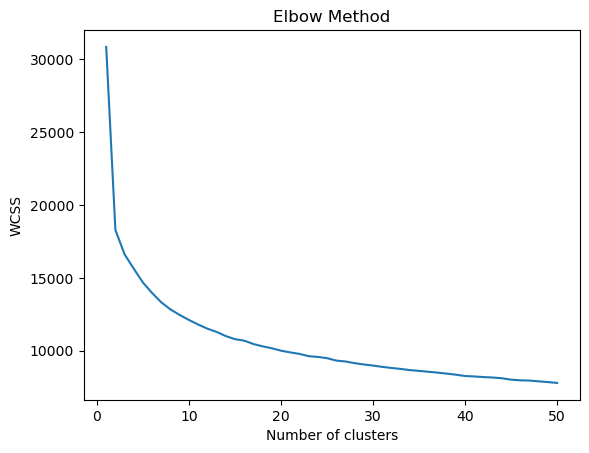

In [19]:
# use elbow method to determine number of clusters
wcss = []
num_clusters = 50
for i in range(1, num_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(df[df.columns])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, num_clusters+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal k = 10.

Kmeans clustering with k = 10.

In [20]:
kmeans = KMeans(n_clusters=10)
kmeans_results = kmeans.fit_predict(df)

PCA to reduce to 2 dimensions for visualization.

In [21]:
pca_num_components = 2

pca = PCA(n_components=pca_num_components)
pca_result = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_result, columns=['pca1', 'pca2'])

t-SNE for visualization.

In [22]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(df)
tsne_df = pd.DataFrame(tsne, columns=['var1', 'var2'])

Visualize clusters.

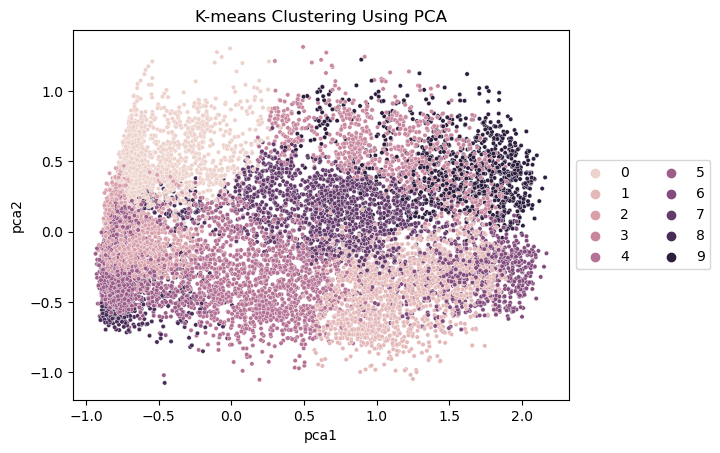

In [23]:
sns.scatterplot(x="pca1", y="pca2", hue=kmeans_results, data=pca_df, legend='full', s=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol = 2)
plt.title('K-means Clustering Using PCA')
plt.show()

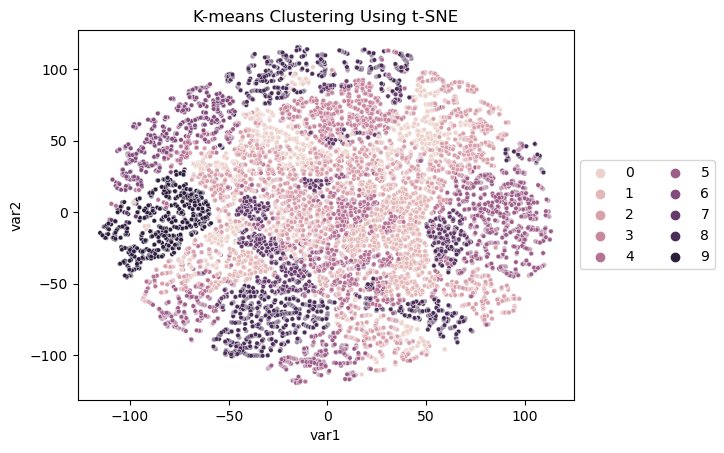

In [24]:
sns.scatterplot(x="var1", y="var2", hue=kmeans_results, data=tsne_df, legend='full', s=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol = 2)
plt.title('K-means Clustering Using t-SNE')
plt.show()

#### Select top 15 features using K-means clustering, and train and test the model.

In [25]:
df = pd.read_csv('knn_input.csv')

In [26]:
# drop time column
df = df.drop(columns=['Time'])

In [27]:
def calculate_inertia(c, data):
    """
    Calculate inertia of K-means clustering.
    """
    kmeans = KMeans(n_clusters=c, init='k-means++', random_state=101)
    kmeans.fit(data)
    return kmeans.inertia_

Find useful features based on inertia values.

In [28]:
wcss_1 = []
wcss_2 = []
wcss_3 = []
num_clusters = 15
TOP_N = 15

# calculate inertia
for i in range(1, num_clusters+1):
    iner_1 = []
    iner_2 = []
    iner_3 = []
    for j in df.columns[:-3]:
        iner_1.append(calculate_inertia(i, df[[j, 'LMP_Norm']]))
        iner_2.append(calculate_inertia(i, df[[j, 'PV_kwAC_out_Norm']]))
        iner_3.append(calculate_inertia(i, df[[j, 'Community_Load']]))
    wcss_1.append(iner_1)
    wcss_2.append(iner_2)
    wcss_3.append(iner_3)

In [29]:
# convert to numpy array
wcss_arr_1 = np.array(wcss_1)
wcss_arr_2 = np.array(wcss_2)
wcss_arr_3 = np.array(wcss_3)

# calculate sum for each feature
sum_1 = np.sum(wcss_arr_1, axis=0)
sum_2 = np.sum(wcss_arr_2, axis=0)
sum_3 = np.sum(wcss_arr_3, axis=0)

# sort by index sum of each feature in ascending order
col_idx_1 = np.argsort(sum_1).tolist()
col_idx_2 = np.argsort(sum_2).tolist()
col_idx_3 = np.argsort(sum_3).tolist()

# remove spare features
spare_cols = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
for idx in spare_cols:
    col_idx_1.remove(idx)
    col_idx_2.remove(idx)
    col_idx_3.remove(idx)

# concat top 15 features of each target and return top 15 sorted unique features 
arr, idx = np.unique(np.concatenate((col_idx_1[:TOP_N], col_idx_2[:TOP_N], col_idx_3[:TOP_N]), 0), return_index=True)

# sort top 15 features back to original order
top_15_features = arr[np.argsort(idx)][:TOP_N]

# print top 15 features
print('Top 15 features:')
print(df.columns[top_15_features])

# add 3 targets to top_15_features
target_idx = [len(df.columns)-3, len(df.columns)-2, len(df.columns)-1]
top_15_features_and_3_targets = np.append(top_15_features, target_idx)

# return new dataframe with top 15 features and 3 targets
df = df.iloc[:, top_15_features_and_3_targets]

Top 15 features:
Index(['Congestion_Norm', 'Small Hydro', 'Energy_Norm', 'Loss_Norm', 'Biogas',
       'Geothermal', 'Gas Price', 'Load', 'Biomass',
       'Regulation Up Total (MW)', 'Non-Spinning Reserves Total (MW)',
       'Total Volume(MW)', 'Batteries', 'AlbedoDaily_norm',
       'WindSpeed10m_norm'],
      dtype='object')


Extract features and target.

In [30]:
x = df.values[:, :-3]
y = df.values[:, -3:]

Split data into training and test set with ratio of 0.8 and 0.2 respectively.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [32]:
# LMP_Norm
y_train_1 = y_train[:, 0]
y_test_1 = y_test[:, 0]

# PV_kwAC_out_Norm
y_train_2 = y_train[:, 1]
y_test_2 = y_test[:, 1]

# Community_Load
y_train_3 = y_train[:, 2]
y_test_3 = y_test[:, 2]

KNN Regression.

Tune the model with different distance method.

In [33]:
# mumber of k-fold
cv_splits = 5

# initialize k-fold
cv = KFold(n_splits=cv_splits, shuffle=True, random_state=101)

# number of k for tuning
k = np.arange(1, 10, 1)

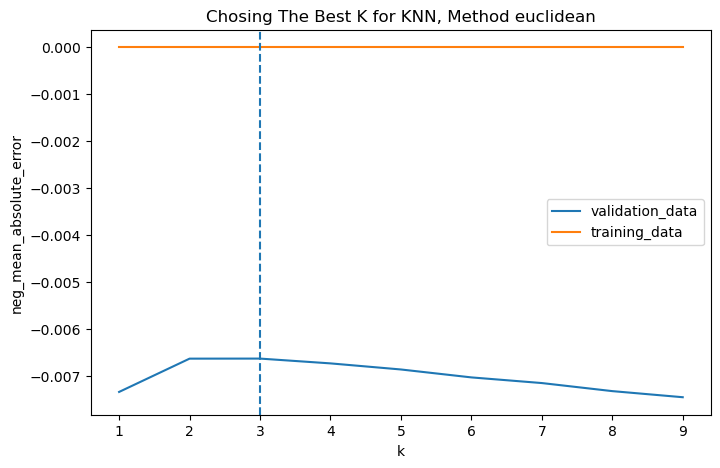

Target = LMP_Norm
Chosen k: 3 			 Training NMAE: 0.0000 			 Validation NMAE: -0.0066
Fit time in second: 0.0087 	 Score time in second: 0.2315 		 cv_splits: 5


In [34]:
# tune model using euclidean distance method
# target column is LMP_Norm
score_metric = 'neg_mean_absolute_error'
dist_method = 'euclidean'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_1, cv, score_metric, dist_method)
print("Target = LMP_Norm")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time in second: %.4f \t Score time in second: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


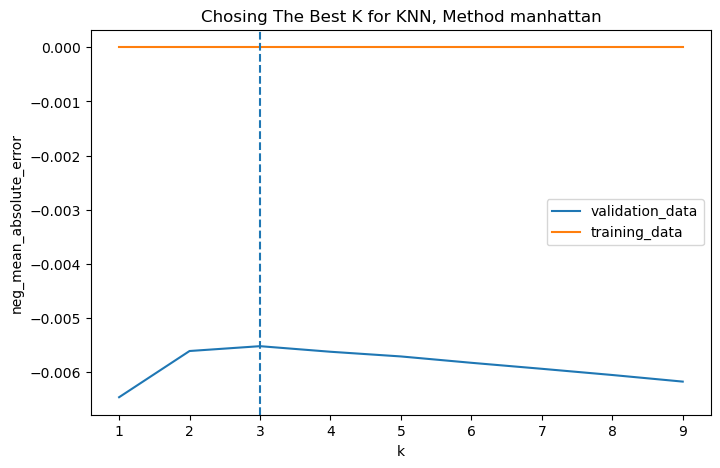

Target = LMP_Norm
Chosen k: 3 			 Training NMAE: 0.0000 		 Validation NMAE: -0.0055
Fit time: 0.0088 		 Score time: 0.4239 		 cv_splits: 5


In [35]:
# tune model using manhattan distance method
# target column is LMP_Norm
score_metric = 'neg_mean_absolute_error'
dist_method = 'manhattan'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_1, cv, score_metric, dist_method)
print("Target = LMP_Norm")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time: %.4f \t\t Score time: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


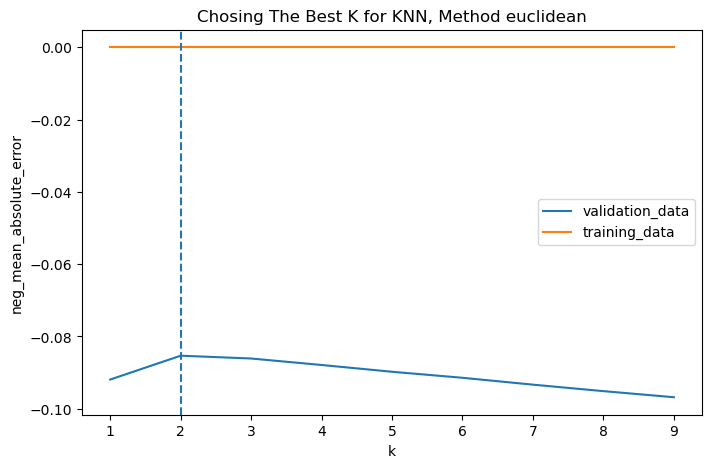

Target = PV_kwAC_out_Norm
Chosen k: 2 			 Training NMAE: 0.0000 			 Validation NMAE: -0.0853
Fit time in second: 0.0086 	 Score time in second: 0.2101 		 cv_splits: 5


In [36]:
# tune model using euclidean distance method
# target column is PV_kwAC_out_Norm
score_metric = 'neg_mean_absolute_error'
dist_method = 'euclidean'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_2, cv, score_metric, dist_method)
print("Target = PV_kwAC_out_Norm")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time in second: %.4f \t Score time in second: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


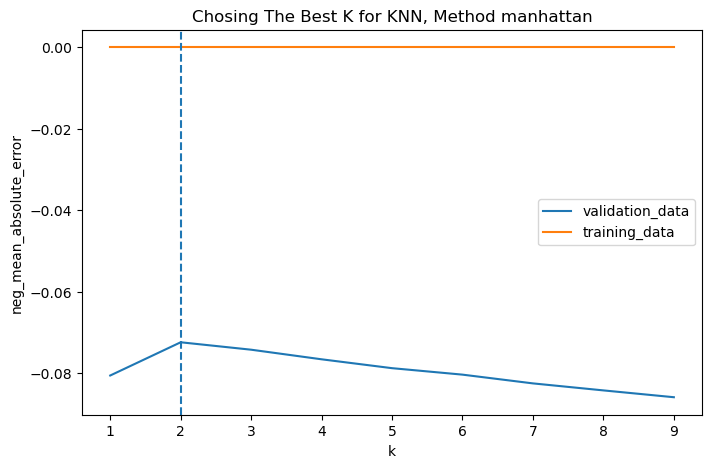

Target = PV_kwAC_out_Norm
Chosen k: 2 			 Training NMAE: 0.0000 		 Validation NMAE: -0.0725
Fit time: 0.0086 		 Score time: 0.3768 		 cv_splits: 5


In [37]:
# tune model using manhattan distance method
# target column is PV_kwAC_out_Norm
score_metric = 'neg_mean_absolute_error'
dist_method = 'manhattan'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_2, cv, score_metric, dist_method)
print("Target = PV_kwAC_out_Norm")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time: %.4f \t\t Score time: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


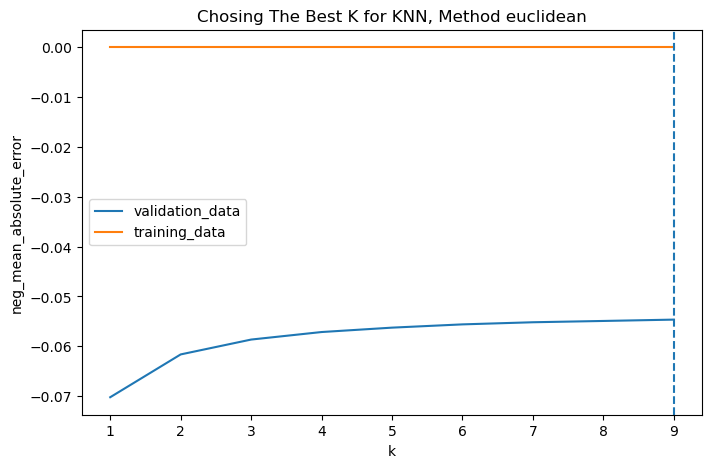

Target = Community_Load
Chosen k: 9 			 Training NMAE: 0.0000 			 Validation NMAE: -0.0547
Fit time in second: 0.0085 	 Score time in second: 0.2806 		 cv_splits: 5


In [38]:
# tune model using euclidean distance method
# target column is Community_Load
score_metric = 'neg_mean_absolute_error'
dist_method = 'euclidean'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_3, cv, score_metric, dist_method)
print("Target = Community_Load")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time in second: %.4f \t Score time in second: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


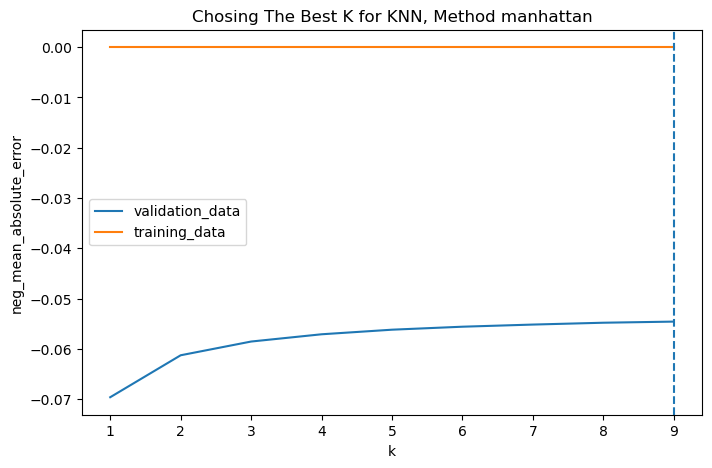

Target = Community_Load
Chosen k: 9 			 Training NMAE: 0.0000 		 Validation NMAE: -0.0546
Fit time: 0.0086 		 Score time: 0.5231 		 cv_splits: 5


In [39]:
# tune model using manhattan distance method
# target column is Community_Load
score_metric = 'neg_mean_absolute_error'
dist_method = 'manhattan'
chosen_k, training_score_with_max_val_score, max_validation_score, fit_time, score_time = tune_model(k, X_train, y_train_3, cv, score_metric, dist_method)
print("Target = Community_Load")
print("Chosen k: %d \t\t\t Training NMAE: %.4f \t\t Validation NMAE: %.4f" % (chosen_k, training_score_with_max_val_score, max_validation_score))
print("Fit time: %.4f \t\t Score time: %.4f \t\t cv_splits: %d" % (fit_time, score_time, cv_splits))


Test the model.

In [40]:
# test model using manhattan distance method
k = 3
m = 'manhattan'
t = 'LMP_Norm'

knn = KNeighborsRegressor(n_neighbors=k, metric=m, weights='distance')
knn.fit(X_train, y_train_1)
pred = knn.predict(X_test)

print("k = %d, distance method = %s, target = %s" % (k, m, t))
print()

# mean absolute error
mae = mean_absolute_error(y_test_1, pred)

# mean absolute percentage error
mape = mean_absolute_percentage_error(y_test_1, pred)

print("mae =", mae)
print("mape =", mape)

k = 3, distance method = manhattan, target = LMP_Norm

mae = 0.0047937833183185645
mape = 0.03721343638210226


In [41]:
# test model using manhattan distance method
k = 3
m = 'manhattan'
t = 'PV_kwAC_out_Norm'

knn = KNeighborsRegressor(n_neighbors=k, metric=m, weights='distance')
knn.fit(X_train, y_train_2)
pred = knn.predict(X_test)

print("k = %d, distance method = %s, target = %s" % (k, m, t))
print()

# mean absolute error
mae = mean_absolute_error(y_test_2, pred)

# mean absolute percentage error
mape = mean_absolute_percentage_error(y_test_2, pred)

print("mae =", mae)
print("mape =", mape)

k = 3, distance method = manhattan, target = PV_kwAC_out_Norm

mae = 0.07060523386107534
mape = 51466550487186.875


In [42]:
# test model using manhattan distance method
k = 3
m = 'manhattan'
t = 'Community_Load'

knn = KNeighborsRegressor(n_neighbors=k, metric=m, weights='distance')
knn.fit(X_train, y_train_3)
pred = knn.predict(X_test)

print("k = %d, distance method = %s, target = %s" % (k, m, t))
print()

# mean absolute error
mae = mean_absolute_error(y_test_3, pred)

# mean absolute percentage error
mape = mean_absolute_percentage_error(y_test_3, pred)

print("mae =", mae)
print("mape =", mape)

k = 3, distance method = manhattan, target = Community_Load

mae = 0.058160874310091905
mape = 0.1252576634501621


K-Means Clustering.

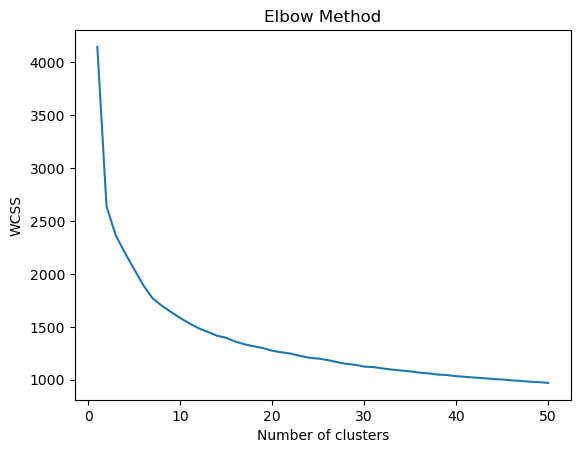

In [43]:
# use elbow method to determine number of clusters
wcss = []
num_clusters = 50
for i in range(1, num_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(df[df.columns])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, num_clusters+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal k = 10.

Kmeans clustering with k = 10.

In [44]:
kmeans = KMeans(n_clusters=10)
kmeans_results = kmeans.fit_predict(df)

PCA to reduce to 2 dimensions for visualization.

In [45]:
pca_num_components = 2

pca = PCA(n_components=pca_num_components)
pca_result = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_result, columns=['pca1', 'pca2'])

t-SNE for visualization.

In [46]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(df)
tsne_df = pd.DataFrame(tsne, columns=['var1', 'var2'])

Visualize clusters.

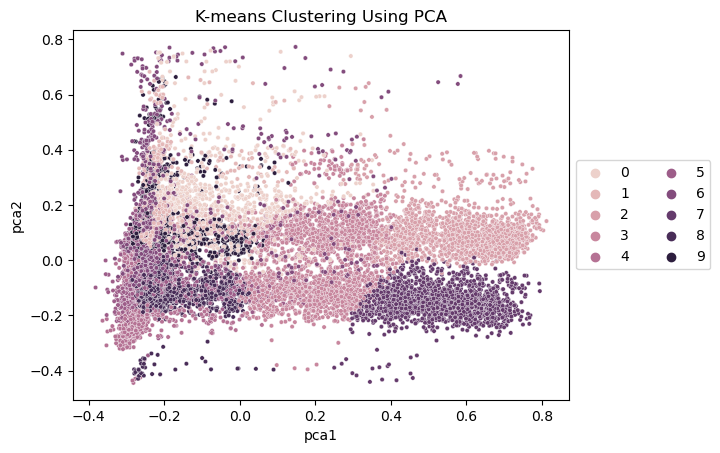

In [47]:
sns.scatterplot(x="pca1", y="pca2", hue=kmeans_results, data=pca_df, legend='full', s=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol = 2)
plt.title('K-means Clustering Using PCA')
plt.show()

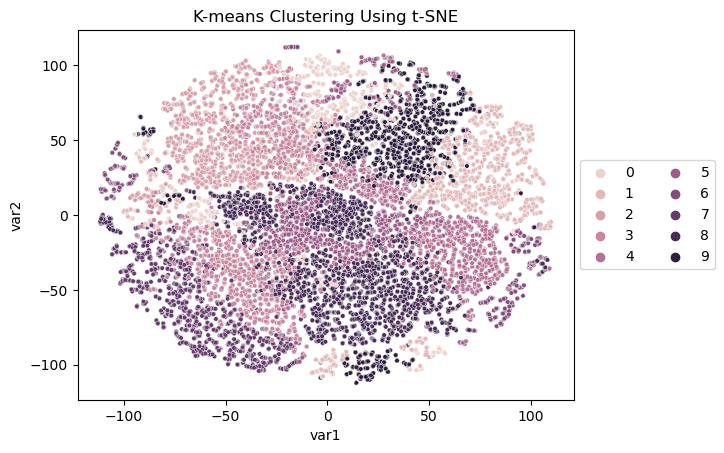

In [48]:
sns.scatterplot(x="var1", y="var2", hue=kmeans_results, data=tsne_df, legend='full', s=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol = 2)
plt.title('K-means Clustering Using t-SNE')
plt.show()

Save output for next model.

In [49]:
# load original dataset
df = pd.read_csv('knn_input.csv')

time = df['Time']

# drop time column
df = df.drop(columns=['Time'])

# select top 15 features, 3 targets and time column
df_out = df[df.columns[top_15_features_and_3_targets]]
df_out.insert(0, 'Time', time)

# save new dataset
df_out.to_csv('knn_output.csv', index=False)